In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy as sci
import numpy as np
import seaborn as sns
import datetime as dt

In [16]:
path1 = os.path.join('..','Data','Raw','googleplaystore.csv')
path2 = os.path.join('..','Data','Raw','googleplaystore_user_reviews.csv')
outPath = os.path.join('..','Data','Combined','comb.csv')

In [4]:
gps_df = pd.read_csv(path1)
gps_usr_rev_pd = pd.read_csv(path2)

In [5]:
gps_df.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

In [5]:
gps_usr_rev_pd.count()

App                       64295
Translated_Review         37427
Sentiment                 37432
Sentiment_Polarity        37432
Sentiment_Subjectivity    37432
dtype: int64

In [6]:
test_merge_df = pd.merge(gps_df, gps_usr_rev_pd, on='App')

In [7]:
test_merge_df.count()

App                       122662
Category                  122662
Rating                    122622
Reviews                   122662
Size                      122662
Installs                  122662
Type                      122662
Price                     122662
Content Rating            122662
Genres                    122662
Last Updated              122662
Current Ver               122662
Android Ver               122662
Translated_Review          72605
Sentiment                  72615
Sentiment_Polarity         72615
Sentiment_Subjectivity     72615
dtype: int64

In [8]:
comb_df = test_merge_df.copy()

In [9]:
comb_df.to_csv(outPath, index=False, header=True)

In [18]:
comb_df.dtypes

App                        object
Category                   object
Rating                    float64
Reviews                    object
Size                       object
Installs                   object
Type                       object
Price                      object
Content Rating             object
Genres                     object
Last Updated               object
Current Ver                object
Android Ver                object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [11]:
def dateFun(str):
    return dt.datetime.strptime(str,'%B %d, %Y')

In [127]:
dateFun('August 2, 2018')

datetime.datetime(2018, 8, 2, 0, 0)

In [19]:
comb_df['Last Updated(Date)'] = pd.to_datetime(comb_df['Last Updated'])

In [20]:
comb_df['Last Updated'].head()

0    January 15, 2018
1    January 15, 2018
2    January 15, 2018
3    January 15, 2018
4    January 15, 2018
Name: Last Updated, dtype: object

In [69]:
df = gps_df.dropna()[['Category','Rating','Reviews']]

In [70]:
df.head()

,Category,Rating,Reviews
0,ART_AND_DESIGN,4.1,159
1,ART_AND_DESIGN,3.9,967
2,ART_AND_DESIGN,4.7,87510
3,ART_AND_DESIGN,4.5,215644
4,ART_AND_DESIGN,4.3,967


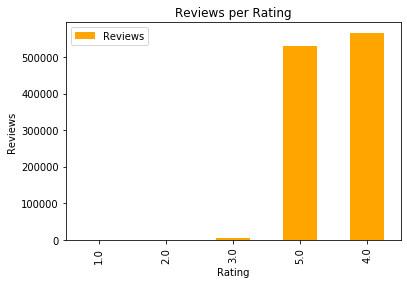

In [143]:
# pd.DataFrame.plot()
#Plotting a simple bar graph to represent the number of reviews per rating

df.Reviews = df.Reviews.astype('float64')
df.Rating = round(df.Rating,0)
df.groupby('Rating').mean().sort_values('Reviews').plot(kind='bar',color = ['orange'])
plt.title('Reviews per Rating')
plt.ylabel('Reviews')
plt.savefig('Reviews_per_Rating.png')


In [101]:
df2 = df.groupby(['Category','Rating']).sum().sort_index(ascending=False)
df2

Reviews
Category          Rating            
WEATHER           5.0       353741.0
                  4.0     14250839.0
                  3.0          115.0
VIDEO_PLAYERS     5.0     20061865.0
                  4.0     89919857.0
...                              ...
AUTO_AND_VEHICLES 3.0          324.0
                  2.0           83.0
ART_AND_DESIGN    5.0       540777.0
                  4.0      1173054.0
                  3.0          486.0

[131 rows x 1 columns]

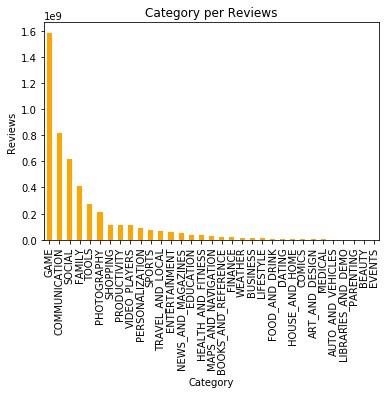

In [158]:
#Plotting a simple bar graph to represent the reviews in each category
df.groupby('Category').sum().sort_values('Reviews',ascending=False).Reviews.plot(kind='bar',color = ['orange'])
plt.title('Category per Reviews')
plt.ylabel('Reviews')                                                                              
plt.savefig('Category_per_Reviews.png')

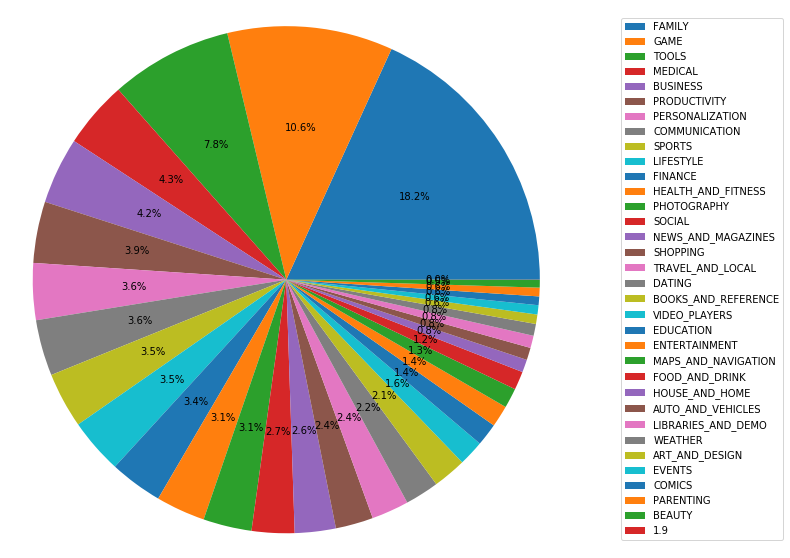

<Figure size 432x288 with 0 Axes>

In [144]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
df3 = gps_df["Category"].value_counts()
labels = df3.index
sizes = df3.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.show()
plt.savefig('Category.png')

4.193338315362448


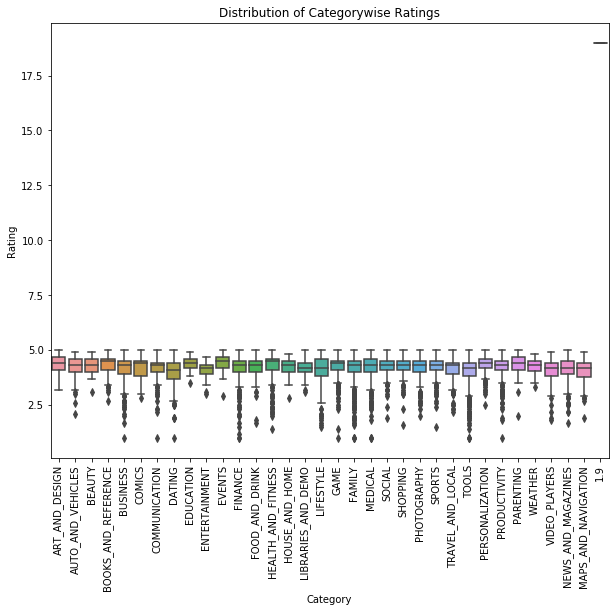

In [17]:
#Ratings of the apps over various categories
avg_rating = gps_df["Rating"].mean()
print(avg_rating)
plt.figure(figsize=(10,8))
sns.boxplot('Category','Rating',data=gps_df)
plt.title("Distribution of Categorywise Ratings")
plt.ylabel("Rating")
plt.xlabel("Category")
plt.xticks(rotation=90)
# plt.savefig('data_images/plot3a_income.png',bbox_inches='tight')
plt.show();

In [21]:
# eliminate duplicate apps from the dataframe
gps_df.drop_duplicates(subset = "App", keep = False, inplace = True)

print(gps_df)


                                                   App       Category  Rating  \
8884              "i DT" Fútbol. Todos Somos Técnicos.         SPORTS     NaN   
8532                     +Download 4 Instagram Twitter         SOCIAL     4.5   
324                         - Free Comics - Comic Apps         COMICS     3.5   
4541                                                .R          TOOLS     4.5   
4636                                            /u/app  COMMUNICATION     4.7   
...                                                ...            ...     ...   
6334                           뽕티비 - 개인방송, 인터넷방송, BJ방송  VIDEO_PLAYERS     NaN   
4362                                        💎 I'm rich      LIFESTYLE     3.8   
2575     💘 WhatsLov: Smileys of love, stickers and GIF         SOCIAL     4.6   
7559  📏 Smart Ruler ↔️ cm/inch measuring for homework!          TOOLS     4.0   
882   🔥 Football Wallpapers 4K | Full HD Backgrounds 😍  ENTERTAINMENT     4.7   

     Reviews  Size Installs

In [24]:
# length after adding row 
length1=  len(gps_df)
print(gps_df)

                                                   App       Category  Rating  \
8884              "i DT" Fútbol. Todos Somos Técnicos.         SPORTS     NaN   
8532                     +Download 4 Instagram Twitter         SOCIAL     4.5   
324                         - Free Comics - Comic Apps         COMICS     3.5   
4541                                                .R          TOOLS     4.5   
4636                                            /u/app  COMMUNICATION     4.7   
...                                                ...            ...     ...   
6334                           뽕티비 - 개인방송, 인터넷방송, BJ방송  VIDEO_PLAYERS     NaN   
4362                                        💎 I'm rich      LIFESTYLE     3.8   
2575     💘 WhatsLov: Smileys of love, stickers and GIF         SOCIAL     4.6   
7559  📏 Smart Ruler ↔️ cm/inch measuring for homework!          TOOLS     4.0   
882   🔥 Football Wallpapers 4K | Full HD Backgrounds 😍  ENTERTAINMENT     4.7   

     Reviews  Size Installs

In [20]:
# sorting by first name 
gps_df.sort_values("App", inplace = True)
print(gps_df)
  

                                                   App       Category  Rating  \
8884              "i DT" Fútbol. Todos Somos Técnicos.         SPORTS     NaN   
8532                     +Download 4 Instagram Twitter         SOCIAL     4.5   
324                         - Free Comics - Comic Apps         COMICS     3.5   
4541                                                .R          TOOLS     4.5   
4636                                            /u/app  COMMUNICATION     4.7   
...                                                ...            ...     ...   
6334                           뽕티비 - 개인방송, 인터넷방송, BJ방송  VIDEO_PLAYERS     NaN   
4362                                        💎 I'm rich      LIFESTYLE     3.8   
2575     💘 WhatsLov: Smileys of love, stickers and GIF         SOCIAL     4.6   
7559  📏 Smart Ruler ↔️ cm/inch measuring for homework!          TOOLS     4.0   
882   🔥 Football Wallpapers 4K | Full HD Backgrounds 😍  ENTERTAINMENT     4.7   

     Reviews  Size Installs